In [15]:

import os
from PIL import Image
import matplotlib.pyplot as plt
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader
import torchvision
import torch


In [16]:
# Configuration
DATA_DIR = "data"  # <-- update this path on your machine
IMG_SIZE = 224
BATCH_SIZE = 8


In [17]:
# Define transforms
train_transforms = transforms.Compose([
    transforms.Resize((IMG_SIZE, IMG_SIZE)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(15),
    transforms.ColorJitter(brightness=0.2, contrast=0.2),
    transforms.ToTensor(),
])

val_transforms = transforms.Compose([
    transforms.Resize((IMG_SIZE, IMG_SIZE)),
    transforms.ToTensor(),
])



In [18]:
# Custom dataset class
class StoolDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.root_dir = root_dir
        self.transform = transform
        self.samples = []
        self.class_to_idx = {}
        for idx, class_name in enumerate(sorted(os.listdir(root_dir))):
            class_path = os.path.join(root_dir, class_name)
            if os.path.isdir(class_path):
                self.class_to_idx[class_name] = idx
                for fname in os.listdir(class_path):
                    self.samples.append((os.path.join(class_path, fname), idx))

    def __len__(self):
        return len(self.samples)

    def __getitem__(self, idx):
        img_path, label = self.samples[idx]
        image = Image.open(img_path).convert("RGB")
        if self.transform:
            image = self.transform(image)
        return image, label



In [19]:
# Initialize dataset and loader
dataset = StoolDataset(DATA_DIR, transform=train_transforms)
dataloader = DataLoader(dataset, batch_size=BATCH_SIZE, shuffle=True)

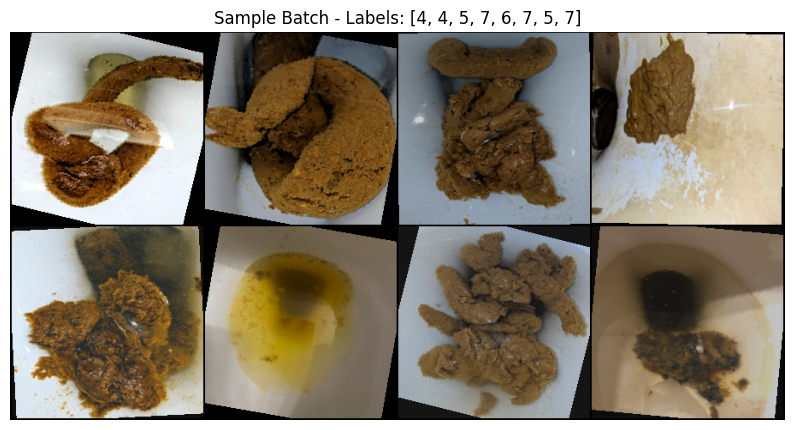

In [ ]:

# Visualize some samples
def show_batch(dl):
    images, labels = next(iter(dl))
    grid_img = torchvision.utils.make_grid(images, nrow=4)
    plt.figure(figsize=(10, 10))
    plt.imshow(grid_img.permute(1, 2, 0))
    plt.title(f"Sample Batch - Labels: {labels.tolist()}")
    plt.axis("off")
    plt.show()

#show_batch(dataloader)